In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
book = pd.read_csv('D:/Books r/Books.csv')
rating  = pd.read_csv('D:/Books r/Ratings.csv')
user= pd.read_csv('D:/Books r/Users.csv')

C:\Users\DELL\AppData\Local\Temp\ipykernel_4128\2624022962.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  book = pd.read_csv('D:/Books r/Books.csv')


In [4]:
print('Books shape', book.shape)
print('rating shape', rating.shape)
print('user shape', user.shape)

Books shape (271360, 8)
rating shape (1149780, 3)
user shape (278858, 3)


In [8]:
book.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [10]:
user.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [12]:
rating.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

# Merge 'book' and 'rating' dataset

In [7]:
br = pd.merge(book, rating, on='ISBN', how='inner')

In [9]:
br.shape

(1031136, 10)

In [11]:
rating_count = br.groupby('Book-Title')['Book-Rating'].count().reset_index()
rating_count = rating_count.rename(columns={'Book-Rating' : 'rating_counts'})
rating_count.head(5)

,Book-Title,rating_counts
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [13]:
avg_rating = br.groupby('Book-Title')['Book-Rating'].mean().reset_index()

In [15]:
avg_rating = avg_rating.rename(columns={'Book-Rating' : 'rating_counts_mean'})

In [17]:
avg_rating

,Book-Title,rating_counts_mean
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


## Merge these two DataFrame

In [19]:
popular_df = rating_count.merge(avg_rating, on='Book-Title')
popular_df

,Book-Title,rating_counts,rating_counts_mean
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [21]:
popular_df[popular_df['rating_counts_mean'] == 0]['rating_counts'].value_counts()

rating_counts
1     74766
2     19046
3      6436
4      2674
5      1223
6       593
7       355
8       169
9        68
10       64
11       44
12       25
13       19
14       12
16        3
15        2
21        2
18        1
19        1
17        1
Name: count, dtype: int64

<Axes: ylabel='Density'>

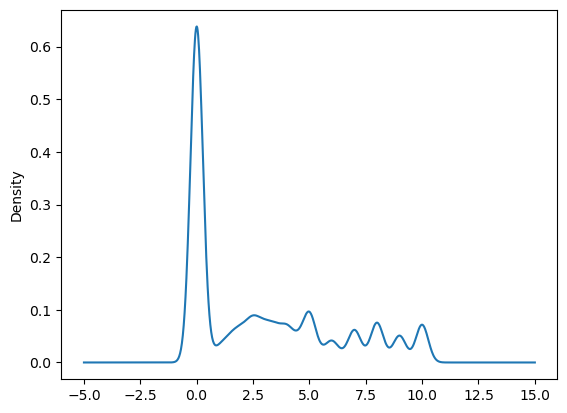

In [23]:
popular_df['rating_counts_mean'].plot(kind='kde')

* We are Creating Collaborative recommendation system. so, why we put those books which have a zero rating. and rating count is low. that's why we are selecting those books which have a greater than 200 count rating
* High Count of Rating = Much Popular
* Low Count of Rating = It is not popular.

<Axes: ylabel='Density'>

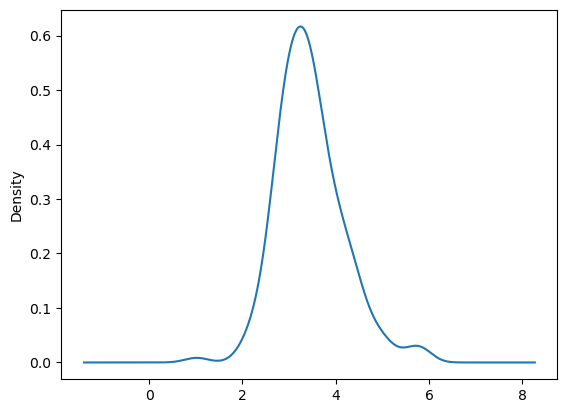

In [25]:
popular_df[popular_df['rating_counts'] >=250]['rating_counts_mean'].plot(kind='kde')

In [27]:
popular_book = popular_df[popular_df['rating_counts'] >250].sort_values('rating_counts_mean', ascending=False).head(50)

In [29]:
popular_book.head()

,Book-Title,rating_counts,rating_counts_mean
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453


In [135]:
popular_books = popular_book.merge(book, on='Book-Title').drop_duplicates('Book-Title')

In [137]:
popular_books = popular_books.drop(['ISBN', 'Image-URL-L'], axis=1)

In [139]:
popular_books

,Book-Title,rating_counts,rating_counts_mean,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...
9,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
13,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...
16,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339681.0...,http://images.amazon.com/images/P/0345339681.0...
17,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339703.0...,http://images.amazon.com/images/P/0345339703.0...
26,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...
28,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339711.0...,http://images.amazon.com/images/P/0345339711.0...
39,To Kill a Mockingbird,510,4.700000,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...,http://images.amazon.com/images/P/0446310786.0...


# Finding Those Users who rated more than 200 different books

In [37]:
x= br.groupby('User-ID').count()['Book-Rating'] > 200

In [39]:
most_rated_user = x[x].index

In [41]:
stan_df = br[br['User-ID'].isin(most_rated_user)]

In [43]:
stan_df.shape

(474007, 10)

# Finding those Books which have more than 50 Rating Count (more than 50 different user rated this book)

In [45]:
y = stan_df.groupby('Book-Title')['Book-Rating'].count() >= 50

In [46]:
rating_50_book = y[y].index
rating_50_book = stan_df[stan_df['Book-Title'].isin(rating_50_book)]

In [49]:
rating_50_book[rating_50_book.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating


In [51]:
pt = rating_50_book.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')

In [53]:
pt.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
pt = pt.fillna(0)

In [57]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Finding Cosine Similarity betwen each books (706*706)

In [59]:
from sklearn.metrics.pairwise import cosine_similarity

In [61]:
similarity_s = cosine_similarity(pt)

In [193]:
similarity_s.shape

(706, 706)

In [191]:
similarity_s[0]

array([1.        , 0.10255025, 0.01220856, 0.        , 0.05367224,
       0.02774901, 0.08216491, 0.13732869, 0.03261686, 0.03667591,
       0.02322418, 0.06766487, 0.02083978, 0.09673735, 0.13388865,
       0.08303112, 0.11153543, 0.05100411, 0.02517784, 0.11706383,
       0.        , 0.14333793, 0.07847534, 0.06150451, 0.08723968,
       0.        , 0.07009814, 0.13658681, 0.07600328, 0.12167134,
       0.00768046, 0.01473221, 0.        , 0.07965814, 0.04522617,
       0.01556271, 0.09495938, 0.0182307 , 0.02610465, 0.07984012,
       0.11679969, 0.0569124 , 0.08354155, 0.08471898, 0.08785938,
       0.05491435, 0.0548505 , 0.27026514, 0.09779123, 0.06016046,
       0.08958835, 0.06748675, 0.        , 0.04468098, 0.01920872,
       0.        , 0.05629067, 0.00557964, 0.07877059, 0.05219479,
       0.18908177, 0.        , 0.01240656, 0.02984572, 0.04279502,
       0.12680125, 0.16566735, 0.        , 0.13357242, 0.06615478,
       0.        , 0.        , 0.        , 0.10968075, 0.02806

In [187]:
def similar_book(book_name):
    index = np.where(pt.index==book_name)[0][0]
    sim_b = sorted(list(enumerate(similarity_s[index])), key= lambda x: x[1], reverse=True)[1:7]

    data = []
    for i in sim_b:
        item = []
        temp = book[book['Book-Title'] == pt.index[i[0]]]
        
        item.extend(list(temp.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)

    return data    

In [189]:
similar_book('1984')

[['Animal Farm',
  'George Orwell',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0312243022.01.MZZZZZZZ.jpg'],
 ['Fahrenheit 451',
  'Ray Bradbury',
  'http://images.amazon.com/images/P/3257208626.01.MZZZZZZZ.jpg']]

In [129]:
popular_books

,Book-Title,rating_counts,rating_counts_mean,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.9,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.8,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Sorcerer's Stone (Book 1),278,5.7,J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...
9,Harry Potter and the Order of the Phoenix (Boo...,347,5.5,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...
13,Harry Potter and the Chamber of Secrets (Book 2),556,5.2,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...
16,The Hobbit : The Enchanting Prelude to The Lor...,281,5.0,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339681.0...
17,The Fellowship of the Ring (The Lord of the Ri...,368,4.9,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339703.0...
26,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.9,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...
28,"The Two Towers (The Lord of the Rings, Part 2)",260,4.9,J.R.R. TOLKIEN,1986,Del Rey,http://images.amazon.com/images/P/0345339711.0...
39,To Kill a Mockingbird,510,4.7,Harper Lee,1988,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...


In [175]:
popular_books['rating_counts_mean'] = popular_books['rating_counts_mean'].apply(lambda x: float(f"{x:.1f}"))

In [179]:
popular_books['rating_counts_mean'].values

array([5.9, 5.8, 5.7, 5.5, 5.2, 5. , 4.9, 4.9, 4.9, 4.7, 4.6, 4.6, 4.5,
       4.5, 4.5, 4.5, 4.4, 4.4, 4.4, 4.4, 4.3, 4.3, 4.3, 4.3, 4.3, 4.2,
       4.2, 4.1, 4.1, 4.1, 4.1, 4.1, 4.1, 4.1, 4. , 4. , 4. , 4. , 4. ,
       4. , 4. , 3.9, 3.9, 3.9, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8])

In [111]:
import pickle

In [113]:
pickle.dump(popular_books, open('popular.pkl','wb'))

In [201]:
pickle.dump(pt, open('pt.pkl','wb'))

In [203]:
pickle.dump(similarity_s, open('similarity_s.pkl','wb'))

In [205]:
pickle.dump(book, open('book.pkl','wb'))